In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import seaborn as sns

# Cache Measurements
### latency vs total data written cache-size/journal-size/full/40GB/4KWrites/unbinned/lat_log_lat.1.log

/usr/local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_conte

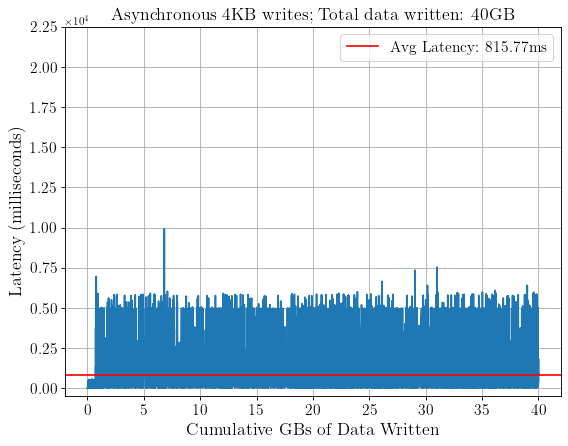

In [18]:
df = pd.read_csv('cache-size/journal-size/full/40GB/4KWrites/lat_log_avg_lat.1.log', sep=',', names=['op1', 'latency', 'op2', 'write_size', 'op3'])
# Convert nanoseconds to microseconds for the 'time' column
df['latency'] = df['latency'] / 1000000  # Convert nanoseconds to miliseconds
# Calculate cumulative GBs of data written
df['cumulative_gb'] = df['write_size'].cumsum() / (1024**3)
# Create the line plot
plt.figure(figsize=(8, 6), dpi=80)
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

sns.lineplot(data=df, x='cumulative_gb', y='latency', linestyle='-')
# sns.lineplot(df['cumulative_gb'], df['latency'], linestyle='-')

# Add labels and title
plt.xlabel('Cumulative GBs of Data Written', fontsize=16)
plt.xticks(np.arange(0, 45, 5), fontsize=14)
plt.ylabel('Latency (milliseconds)', fontsize=16)
plt.yticks(np.arange(0, 25000, 2500), fontsize=14)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.title('Asynchronous 4KB writes; Total data written: 40GB', fontsize=16)

#Add the latency line
average_latency = df['latency'].mean()
average_latency_str = str(round(average_latency, 2)) + 'ms'
plt.axhline(y=average_latency, color='r', linestyle='-', label='Avg Latency: ' + average_latency_str)

# Show the plot
plt.grid(True)  # Optionally, add grid lines
plt.legend(loc='upper right', fontsize=14)
plt.savefig('fig/cache/cache-size_4Kb_writes_40GB.pdf', bbox_inches='tight')
plt.show()

### Latency vs total data written 256K (cache-size/journal-size/full/40GB/256KB_Writes/lat_log_avg_lat.1.log)

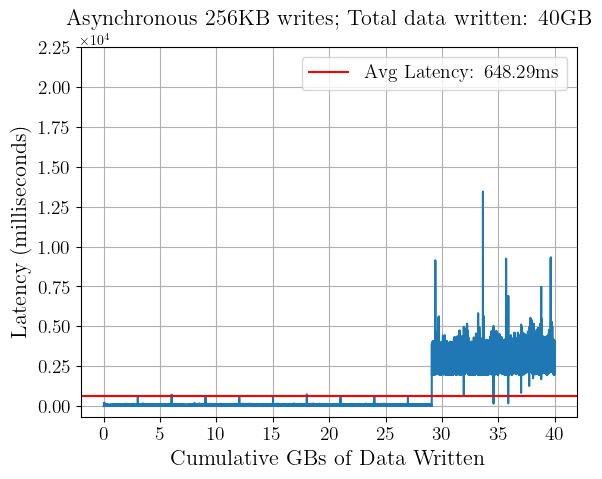

In [12]:
df = pd.read_csv('cache-size/journal-size/full/40GB/256KB_Writes/lat_log_avg_lat.1.log', sep=',', names=['op1', 'latency', 'op2', 'write_size', 'op3'])
# Convert nanoseconds to microseconds for the 'time' column
df['latency'] = df['latency'] / 1000000  # Convert nanoseconds to microseconds
# Calculate cumulative GBs of data written
df['cumulative_gb'] = df['write_size'].cumsum() / (1024**3)
# Create the line plot
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
plt.plot(df['cumulative_gb'], df['latency'], linestyle='-')

# Add labels and title
plt.xlabel('Cumulative GBs of Data Written', fontsize=16)
plt.xticks(np.arange(0, 45, 5), fontsize=14)
plt.ylabel('Latency (milliseconds)', fontsize=16)
plt.yticks(np.arange(0, 25000, 2500), fontsize=14)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.title('Asynchronous 256KB writes; Total data written: 40GB', fontsize=16)

#Add the latency line
average_latency = df['latency'].mean()
average_latency_str = str(round(average_latency, 2)) + 'ms'
plt.axhline(y=average_latency, color='r', linestyle='-', label='Avg Latency: ' + average_latency_str)

# Show the plot
plt.grid(True)  # Optionally, add grid lines
plt.legend(loc='upper right', fontsize=14)
plt.savefig('fig/cache/cache-size_256Kb_writes_40GB.pdf', bbox_inches='tight')
plt.show()

### Latency vs Total Writes written 512KB cache-size/journal-size/full/40GB/512KB_Writes/400GB/round2/lat_log_avg_lat.1.log

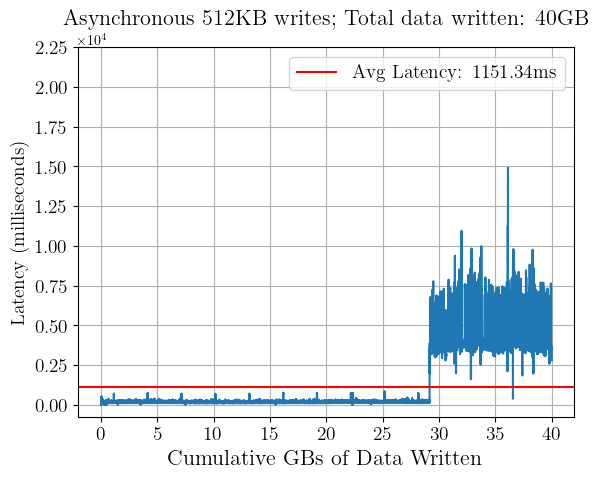

In [13]:
df = pd.read_csv('cache-size/journal-size/full/40GB/512KB_Writes/400GB/round2/lat_log_avg_lat.1.log', sep=',', names=['op1', 'latency', 'op2', 'write_size', 'op3'])
# Convert nanoseconds to microseconds for the 'time' column
df['latency'] = df['latency'] / 1000000  # Convert nanoseconds to microseconds
# Calculate cumulative GBs of data written
df['cumulative_gb'] = df['write_size'].cumsum() / (1024**3)
# Create the line plot
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
# plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.plot(df['cumulative_gb'], df['latency'], linestyle='-')

# Add labels and title
plt.xlabel('Cumulative GBs of Data Written', fontsize=16)
plt.xticks(np.arange(0, 45, 5), fontsize=14)
plt.ylabel('Latency (milliseconds)', fontsize=14)
plt.yticks(np.arange(0, 25000, 2500), fontsize=14)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.title('Asynchronous 512KB writes; Total data written: 40GB', fontsize=16)

#Add the latency line
average_latency = df['latency'].mean()
average_latency_str = str(round(average_latency, 2)) + 'ms'
plt.axhline(y=average_latency, color='r', linestyle='-', label='Avg Latency: ' + average_latency_str)

# Show the plot
plt.grid(True)  # Optionally, add grid lines
plt.legend(loc='upper right', fontsize=14)
plt.savefig('fig/cache/cache-size_512Kb_writes_40GB.pdf', bbox_inches='tight')
plt.show()

### cache-size/journal-size/full/40GB/1MB_Writes/400GB/lat_log_avg_lat.1.log

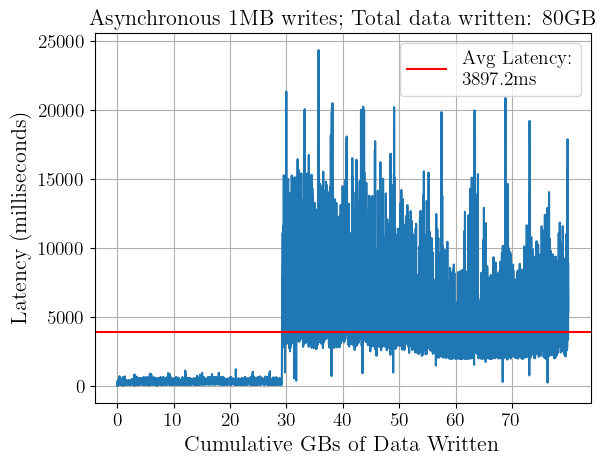

In [14]:
df = pd.read_csv('cache-size/journal-size/full/40GB/1MB_Writes/400GB/lat_log_avg_lat.1.log', sep=',', names=['op1', 'latency', 'op2', 'write_size', 'op3'])
# Convert nanoseconds to microseconds for the 'time' column
df['latency'] = df['latency'] / 1000000  # Convert nanoseconds to microseconds
# Calculate cumulative GBs of data written
df['cumulative_gb'] = df['write_size'].cumsum() / (1024**3)
# Create the line plot
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
plt.plot(df['cumulative_gb'], df['latency'], linestyle='-')

# Add labels and title
plt.xlabel('Cumulative GBs of Data Written', fontsize=16)
plt.xticks(np.arange(0, 80, 10), fontsize=14)
plt.ylabel('Latency (milliseconds)', fontsize=16)
plt.yticks(fontsize=14) #np.arange(0, 20000, 2500))
plt.title('Asynchronous 1MB writes; Total data written: 80GB', fontsize=16)

#Add the latency line
average_latency = df['latency'].mean()
average_latency_str = str(round(average_latency, 2)) + 'ms'
plt.axhline(y=average_latency, color='r', linestyle='-', label='Avg Latency:\n' + average_latency_str)

# Show the plot
plt.grid(True)  # Optionally, add grid lines
plt.legend(loc='upper right', fontsize=14)
plt.savefig('fig/cache/cache-size_1MB_writes_80GB.pdf', bbox_inches='tight')
plt.show()

---------------------------------------------------

# Pause tests 256KB writes, different pauses

### Run1

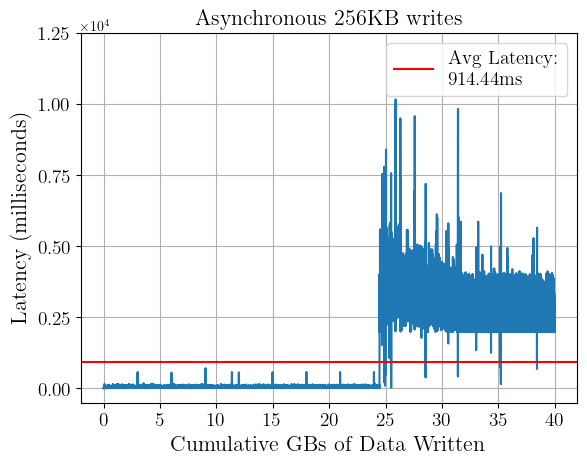

In [15]:
df = pd.read_csv('cache-size/cleaning-stop/256KBWrite/run1/lat_log_avg_lat.1.log', sep=',', names=['op1', 'latency', 'op2', 'write_size', 'op3'])
# Convert nanoseconds to microseconds for the 'time' column
df['latency'] = df['latency'] / 1000000  # Convert nanoseconds to microseconds
# Calculate cumulative GBs of data written
df['cumulative_gb'] = df['write_size'].cumsum() / (1024**3)
# Create the line plot
# plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
plt.plot(df['cumulative_gb'], df['latency'], linestyle='-')


#Add the latency line
average_latency = df['latency'].mean()
average_latency_str = str(round(average_latency, 2)) + 'ms'
plt.axhline(y=average_latency, color='r', linestyle='-', label='Avg Latency:\n' + average_latency_str)

# Add labels and title
plt.xlabel('Cumulative GBs of Data Written', fontsize=16)
plt.xticks(np.arange(0, 45, 5), fontsize=14)
plt.ylabel('Latency (milliseconds)', fontsize=16)
plt.yticks(np.arange(0, 15000, 2500), fontsize=14)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.title('Asynchronous 256KB writes', fontsize=16)

# Show the plot
plt.grid(True)  # Optionally, add grid lines
plt.legend(loc='upper right', fontsize=14)
plt.savefig('fig/cache/pause_test_256KB_writes_run1.pdf', bbox_inches='tight')
plt.show()

### Run2

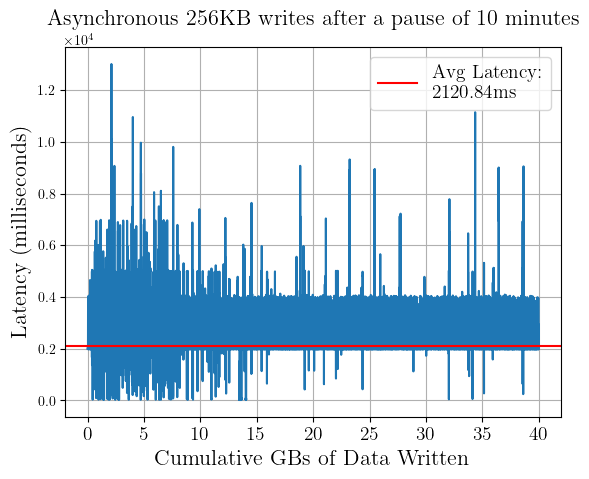

In [16]:
df = pd.read_csv('cache-size/cleaning-stop/256KBWrite/run2/lat_log_avg_lat.1.log', sep=',', names=['op1', 'latency', 'op2', 'write_size', 'op3'])
# Convert nanoseconds to microseconds for the 'time' column
df['latency'] = df['latency'] / 1000000  # Convert nanoseconds to microseconds
# Calculate cumulative GBs of data written
df['cumulative_gb'] = df['write_size'].cumsum() / (1024**3)
# Create the line plot
# plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
plt.plot(df['cumulative_gb'], df['latency'], linestyle='-')

# Add labels and title
plt.xlabel('Cumulative GBs of Data Written', fontsize=16)
plt.xticks(np.arange(0, 45, 5), fontsize=14)
plt.ylabel('Latency (milliseconds)', fontsize=16)
# plt.yticks(np.arange(0, 15000, 2500), fontsize=14)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.title('Asynchronous 256KB writes after a pause of 10 minutes', fontsize=16)

#Add the latency line
average_latency = df['latency'].mean()
average_latency_str = str(round(average_latency, 2)) + 'ms'
plt.axhline(y=average_latency, color='r', linestyle='-', label='Avg Latency:\n' + average_latency_str)

# Show the plot
plt.grid(True)  # Optionally, add grid lines
plt.legend(loc='upper right', fontsize=14)
plt.savefig('fig/cache/pause_test_256KB_writes_run2.pdf', bbox_inches='tight')
plt.show()

### Run 3:


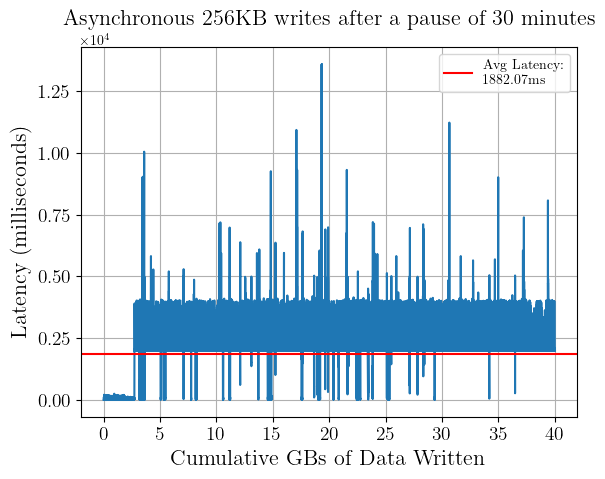

In [17]:
df = pd.read_csv('cache-size/cleaning-stop/256KBWrite/run3/lat_log_avg_lat.1.log', sep=',', names=['op1', 'latency', 'op2', 'write_size', 'op3'])
# Convert nanoseconds to microseconds for the 'time' column
df['latency'] = df['latency'] / 1000000  # Convert nanoseconds to microseconds
# Calculate cumulative GBs of data written
df['cumulative_gb'] = df['write_size'].cumsum() / (1024**3)
# Create the line plot
# plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
plt.plot(df['cumulative_gb'], df['latency'], linestyle='-')

# Add labels and title
plt.xlabel('Cumulative GBs of Data Written', fontsize=16)
plt.xticks(np.arange(0, 45, 5), fontsize=14)
plt.ylabel('Latency (milliseconds)', fontsize=16)
plt.yticks(np.arange(0, 15000, 2500), fontsize=14)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.title('Asynchronous 256KB writes after a pause of 30 minutes', fontsize=16)

#Add the latency line
average_latency = df['latency'].mean()
average_latency_str = str(round(average_latency, 2)) + 'ms'
plt.axhline(y=average_latency, color='r', linestyle='-', label='Avg Latency:\n' + average_latency_str)

# Show the plot
plt.grid(True)  # Optionally, add grid lines
plt.legend(loc='upper right')
plt.savefig('fig/cache/pause_test_256KB_writes_run3.pdf', bbox_inches='tight')
plt.show()

1 MB Pause Tests

RUN 1 (No pause) : cache-size/1MB-3_pauses_test/run1/lat_log_avg_lat.1.log

In [4]:
df_1mb_run1 = pd.read_csv('cache-size/1MB-3_pauses_test/run1/lat_log_avg_lat.1.log', sep=',', names=['op1', 'latency', 'op2', 'write_size', 'op3'])
# Convert nanoseconds to microseconds for the 'time' column
df_1mb_run1['latency'] = df_1mb_run1['latency'] / 1000000  # Convert nanoseconds to microseconds
# Calculate cumulative GBs of data written
df_1mb_run1['cumulative_gb'] = df_1mb_run1['write_size'].cumsum() / (1024**3)

RUN 2: (Sleep 10m) cache-size/1MB-3_pauses_test/run2/lat_log_avg_lat.1.log

In [5]:
df_1mb_run2 = pd.read_csv('cache-size/1MB-3_pauses_test/run2/lat_log_avg_lat.1.log', sep=',', names=['op1', 'latency', 'op2', 'write_size', 'op3'])
# Convert nanoseconds to microseconds for the 'time' column
df_1mb_run2['latency'] = df_1mb_run2['latency'] / 1000000  # Convert nanoseconds to microseconds
# Calculate cumulative GBs of data written
df_1mb_run2['cumulative_gb'] = df_1mb_run2['write_size'].cumsum() / (1024**3)


RUN 3: (Sleep 30 mins) cache-size/1MB-3_pauses_test/run3/lat_log_avg_lat.1.log

In [6]:
df_1mb_run3 = pd.read_csv('cache-size/1MB-3_pauses_test/run3/lat_log_avg_lat.1.log', sep=',', names=['op1', 'latency', 'op2', 'write_size', 'op3'])
# Convert nanoseconds to microseconds for the 'time' column
df_1mb_run3['latency'] = df_1mb_run3['latency'] / 1000000  # Convert nanoseconds to microseconds
# Calculate cumulative GBs of data written
df_1mb_run3['cumulative_gb'] = df_1mb_run3['write_size'].cumsum() / (1024**3)

RUN 4: (Sleep 3 hrs) cache-size/1MB-3_pauses_test/run4/lat_log_avg_lat.1.log

In [7]:
df_1mb_run4 = pd.read_csv('cache-size/1MB-3_pauses_test/run4/lat_log_avg_lat.1.log', sep=',', names=['op1', 'latency', 'op2', 'write_size', 'op3'])
# Convert nanoseconds to microseconds for the 'time' column
df_1mb_run4['latency'] = df_1mb_run4['latency'] / 1000000  # Convert nanoseconds to microseconds
# Calculate cumulative GBs of data written
df_1mb_run4['cumulative_gb'] = df_1mb_run4['write_size'].cumsum() / (1024**3)

PLOT ALL 1MB PAUSE TESTS

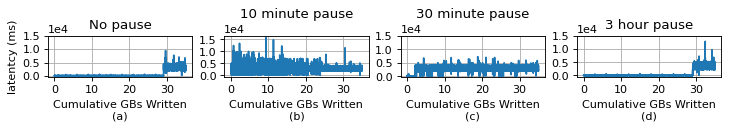

In [31]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, layout='constrained',figsize=(9, 1.5), sharey=False, dpi=80)
ax1.plot(df_1mb_run1['cumulative_gb'], df_1mb_run1['latency'], linestyle='-', label= "No pause")
ax2.plot(df_1mb_run2['cumulative_gb'], df_1mb_run2['latency'], linestyle='-', label= "10 minute pause")
ax3.plot(df_1mb_run3['cumulative_gb'], df_1mb_run3['latency'], linestyle='-', label= "30 minute pause")
ax4.plot(df_1mb_run4['cumulative_gb'], df_1mb_run4['latency'], linestyle='-', label= "3 hour pause")

ax1.title.set_text('No pause')
# ax1.xaxis.set_ticks(np.arange(0, 1400, 300))
ax1.set_xlabel('Cumulative GBs Written\n(a)')
ax1.yaxis.set_ticks(np.arange(0, 20000, 5000))
ax1.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax1.set_ylabel('latentcy (ms)')
ax1.grid(True)

ax2.title.set_text('10 minute pause')
# ax2.xaxis.set_ticks(np.arange(0, 1400, 300))
ax2.set_xlabel('Cumulative GBs Written\n(b)')
ax2.yaxis.set_ticks(np.arange(0, 20000, 5000))
ax2.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
# ax2.yaxis.set_ticks(np.arange(0, 20, 4))
# ax2.set_ylabel('latentcy (ms)')
ax2.grid(True)

ax3.title.set_text('30 minute pause')
# ax3.xaxis.set_ticks(np.arange(0, 1400, 300))
ax3.set_xlabel('Cumulative GBs Written\n(c)')
ax3.yaxis.set_ticks(np.arange(0, 20000, 5000))
ax3.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
# ax3.set_ylabel('latentcy (ms)')
ax3.grid(True)


ax4.title.set_text('3 hour pause')
# ax3.xaxis.set_ticks(np.arange(0, 1400, 300))
ax4.set_xlabel('Cumulative GBs Written\n(d)')
ax4.yaxis.set_ticks(np.arange(0, 20000, 5000))
ax4.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
# ax4.set_ylabel('latentcy (ms)')
ax4.grid(True)

plt.savefig('/Users/Puneet89/scratch/fast24/fig/cache/pause_test_1MB_all.pdf',bbox_inches='tight')
plt.show()

20 Pauses - Sync (plotting run 1 to run 5)

In [24]:
df_256k_sync1 = pd.read_csv('cache-size/pause-seconds-20-tests/sync/run1/lat_log_avg_lat.1.log', sep=',', names=['op1', 'latency', 'op2', 'write_size', 'op3'])
# Convert nanoseconds to microseconds for the 'time' column
df_256k_sync1['latency'] = df_256k_sync1['latency'] / 1000000  # Convert nanoseconds to microseconds
# Calculate cumulative GBs of data written
df_256k_sync1['cumulative_gb'] = df_256k_sync1['write_size'].cumsum() / (1024**3)

df_256k_sync2 = pd.read_csv('cache-size/pause-seconds-20-tests/sync/run2/lat_log_avg_lat.1.log', sep=',', names=['op1', 'latency', 'op2', 'write_size', 'op3'])
# Convert nanoseconds to microseconds for the 'time' column
df_256k_sync2['latency'] = df_256k_sync2['latency'] / 1000000  # Convert nanoseconds to microseconds
# Calculate cumulative GBs of data written
df_256k_sync2['cumulative_gb'] = df_256k_sync2['write_size'].cumsum() / (1024**3)

df_256k_sync3 = pd.read_csv('cache-size/pause-seconds-20-tests/sync/run3/lat_log_avg_lat.1.log', sep=',', names=['op1', 'latency', 'op2', 'write_size', 'op3'])
# Convert nanoseconds to microseconds for the 'time' column
df_256k_sync3['latency'] = df_256k_sync3['latency'] / 1000000  # Convert nanoseconds to microseconds
# Calculate cumulative GBs of data written
df_256k_sync3['cumulative_gb'] = df_256k_sync3['write_size'].cumsum() / (1024**3)

df_256k_sync4 = pd.read_csv('cache-size/pause-seconds-20-tests/sync/run4/lat_log_avg_lat.1.log', sep=',', names=['op1', 'latency', 'op2', 'write_size', 'op3'])
# Convert nanoseconds to microseconds for the 'time' column
df_256k_sync4['latency'] = df_256k_sync4['latency'] / 1000000  # Convert nanoseconds to microseconds
# Calculate cumulative GBs of data written
df_256k_sync4['cumulative_gb'] = df_256k_sync4['write_size'].cumsum() / (1024**3)

df_256k_sync5 = pd.read_csv('cache-size/pause-seconds-20-tests/sync/run5/lat_log_avg_lat.1.log', sep=',', names=['op1', 'latency', 'op2', 'write_size', 'op3'])
# Convert nanoseconds to microseconds for the 'time' column
df_256k_sync5['latency'] = df_256k_sync5['latency'] / 1000000  # Convert nanoseconds to microseconds
# Calculate cumulative GBs of data written
df_256k_sync5['cumulative_gb'] = df_256k_sync5['write_size'].cumsum() / (1024**3)

FileNotFoundError: [Errno 2] No such file or directory: 'cache-size/pause-seconds-20-tests/sync/run1/lat_log_avg_lat.1.log'

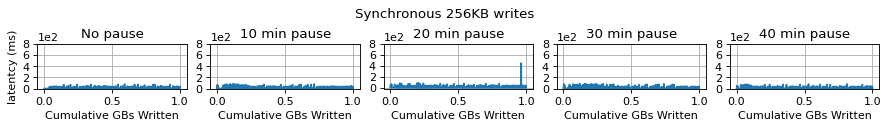

In [39]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, layout='constrained',figsize=(11, 1.5), sharey=False, dpi=80)
ax1.plot(df_256k_sync1['cumulative_gb'], df_256k_sync1['latency'], linestyle='-', label= "No pause")
ax2.plot(df_256k_sync4['cumulative_gb'], df_256k_sync2['latency'], linestyle='-', label= "10 min pause")
ax3.plot(df_256k_sync3['cumulative_gb'], df_256k_sync3['latency'], linestyle='-', label= "20 min pause")
ax4.plot(df_256k_sync4['cumulative_gb'], df_256k_sync4['latency'], linestyle='-', label= "30 min pause")
ax5.plot(df_256k_sync5['cumulative_gb'], df_256k_sync5['latency'], linestyle='-', label= "40 min pause")

ax1.title.set_text('No pause')
# ax1.xaxis.set_ticks(np.arange(0, 1400, 300))
ax1.set_xlabel('Cumulative GBs Written')
ax1.yaxis.set_ticks(np.arange(0, 1000, 200))
ax1.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax1.set_ylabel('latentcy (ms)')
ax1.grid(True)

ax2.title.set_text('10 min pause')
# ax2.xaxis.set_ticks(np.arange(0, 1400, 300))
ax2.set_xlabel('Cumulative GBs Written')
ax2.yaxis.set_ticks(np.arange(0, 1000, 200))
ax2.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
# ax2.yaxis.set_ticks(np.arange(0, 20, 4))
# ax2.set_ylabel('latentcy (ms)')
ax2.grid(True)

ax3.title.set_text('20 min pause')
# ax3.xaxis.set_ticks(np.arange(0, 1400, 300))
ax3.set_xlabel('Cumulative GBs Written')
ax3.yaxis.set_ticks(np.arange(0,1000, 200))
ax3.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
# ax3.set_ylabel('latentcy (ms)')
ax3.grid(True)


ax4.title.set_text('30 min pause')
# ax3.xaxis.set_ticks(np.arange(0, 1400, 300))
ax4.set_xlabel('Cumulative GBs Written')
ax4.yaxis.set_ticks(np.arange(0, 1000, 200))
ax4.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
# ax4.set_ylabel('latentcy (ms)')
ax4.grid(True)

ax5.title.set_text('40 min pause')
# ax3.xaxis.set_ticks(np.arange(0, 1400, 300))
ax5.set_xlabel('Cumulative GBs Written')
ax5.yaxis.set_ticks(np.arange(0, 1000, 200))
ax5.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
# ax4.set_ylabel('latentcy (ms)')
ax5.grid(True)

plt.suptitle('Synchronous 256KB writes', fontsize=12)
# plt.savefig('/Users/Puneet89/scratch/fast24/fig/cache/pause_test_1MB_all.pdf',bbox_inches='tight')
plt.show()

256KB Async Plotting Run 1 to 5

In [31]:
df_256k_async1 = pd.read_csv('cache-size/pause-seconds-20-tests/async/run1/lat_log_avg_lat.1.log', sep=',', names=['op1', 'latency', 'op2', 'write_size', 'op3'])
# Convert nanoseconds to microseconds for the 'time' column
df_256k_async1['latency'] = df_256k_async1['latency'] / 1000000  # Convert nanoseconds to microseconds
# Calculate cumulative GBs of data written
df_256k_async1['cumulative_gb'] = df_256k_async1['write_size'].cumsum() / (1024**3)

df_256k_async2 = pd.read_csv('cache-size/pause-seconds-20-tests/async/run2/lat_log_avg_lat.1.log', sep=',', names=['op1', 'latency', 'op2', 'write_size', 'op3'])
# Convert nanoseconds to microseconds for the 'time' column
df_256k_async2['latency'] = df_256k_async2['latency'] / 1000000  # Convert nanoseconds to microseconds
# Calculate cumulative GBs of data written
df_256k_async2['cumulative_gb'] = df_256k_async2['write_size'].cumsum() / (1024**3)

df_256k_async3 = pd.read_csv('cache-size/pause-seconds-20-tests/async/run3/lat_log_avg_lat.1.log', sep=',', names=['op1', 'latency', 'op2', 'write_size', 'op3'])
# Convert nanoseconds to microseconds for the 'time' column
df_256k_async3['latency'] = df_256k_async3['latency'] / 1000000  # Convert nanoseconds to microseconds
# Calculate cumulative GBs of data written
df_256k_async3['cumulative_gb'] = df_256k_async3['write_size'].cumsum() / (1024**3)

df_256k_async4 = pd.read_csv('cache-size/pause-seconds-20-tests/async/run4/lat_log_avg_lat.1.log', sep=',', names=['op1', 'latency', 'op2', 'write_size', 'op3'])
# Convert nanoseconds to microseconds for the 'time' column
df_256k_async4['latency'] = df_256k_async4['latency'] / 1000000  # Convert nanoseconds to microseconds
# Calculate cumulative GBs of data written
df_256k_async4['cumulative_gb'] = df_256k_async4['write_size'].cumsum() / (1024**3)

df_256k_async5 = pd.read_csv('cache-size/pause-seconds-20-tests/async/run5/lat_log_avg_lat.1.log', sep=',', names=['op1', 'latency', 'op2', 'write_size', 'op3'])
# Convert nanoseconds to microseconds for the 'time' column
df_256k_async5['latency'] = df_256k_async5['latency'] / 1000000  # Convert nanoseconds to microseconds
# Calculate cumulative GBs of data written
df_256k_async5['cumulative_gb'] = df_256k_async5['write_size'].cumsum() / (1024**3)

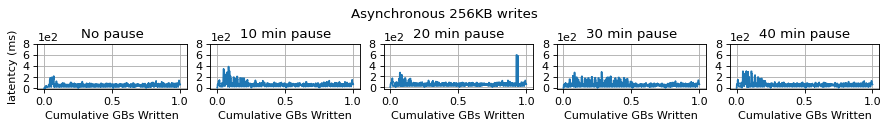

In [37]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, layout='constrained',figsize=(11, 1.5), sharey=False, dpi=80)
ax1.plot(df_256k_async1['cumulative_gb'], df_256k_async1['latency'], linestyle='-', label= "No pause")
ax2.plot(df_256k_async4['cumulative_gb'], df_256k_async2['latency'], linestyle='-', label= "10 min pause")
ax3.plot(df_256k_async3['cumulative_gb'], df_256k_async3['latency'], linestyle='-', label= "20 min pause")
ax4.plot(df_256k_async4['cumulative_gb'], df_256k_async4['latency'], linestyle='-', label= "30 min pause")
ax5.plot(df_256k_async5['cumulative_gb'], df_256k_async5['latency'], linestyle='-', label= "40 min pause")

ax1.title.set_text('No pause')
# ax1.xaxis.set_ticks(np.arange(0, 1400, 300))
ax1.set_xlabel('Cumulative GBs Written')
ax1.yaxis.set_ticks(np.arange(0, 1000, 200))
ax1.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax1.set_ylabel('latentcy (ms)')
ax1.grid(True)

ax2.title.set_text('10 min pause')
# ax2.xaxis.set_ticks(np.arange(0, 1400, 300))
ax2.set_xlabel('Cumulative GBs Written')
ax2.yaxis.set_ticks(np.arange(0, 1000, 200))
ax2.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
# ax2.yaxis.set_ticks(np.arange(0, 20, 4))
# ax2.set_ylabel('latentcy (ms)')
ax2.grid(True)

ax3.title.set_text('20 min pause')
# ax3.xaxis.set_ticks(np.arange(0, 1400, 300))
ax3.set_xlabel('Cumulative GBs Written')
ax3.yaxis.set_ticks(np.arange(0,1000, 200))
ax3.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
# ax3.set_ylabel('latentcy (ms)')
ax3.grid(True)


ax4.title.set_text('30 min pause')
# ax3.xaxis.set_ticks(np.arange(0, 1400, 300))
ax4.set_xlabel('Cumulative GBs Written')
ax4.yaxis.set_ticks(np.arange(0, 1000, 200))
ax4.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
# ax4.set_ylabel('latentcy (ms)')
ax4.grid(True)

ax5.title.set_text('40 min pause')
# ax3.xaxis.set_ticks(np.arange(0, 1400, 300))
ax5.set_xlabel('Cumulative GBs Written')
ax5.yaxis.set_ticks(np.arange(0, 1000, 200))
ax5.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
# ax4.set_ylabel('latentcy (ms)')
ax5.grid(True)
plt.suptitle('Asynchronous 256KB writes', fontsize=12)

# plt.savefig('/Users/Puneet89/scratch/fast24/fig/cache/pause_test_1MB_all.pdf',bbox_inches='tight')
plt.show()